In [1]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import sys
import base64
import os

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
init_notebook_mode(connected=True)


import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.collections import BrokenBarHCollection
import pandas as pd


### Targeted analysis of cluster assignment: Output

This jupyter notebook is to accompany the output of the script `targeted_analysis.py`. 

The script `targeted_analysis.py` uses the supervised classification of samples across data sets to guide the selection
of *p*-value vectors extracted from the same data. Each vector corresponds to a single cluster identified using the mean shift algorithm. Following the query MS vectors are reduced through principal component analysis (PCA) and grouped using Kmeans (K = 10).


#### I. Read data

The identity of the query is stored in the name of the data sets generated as part of the output of `targeted_analysis.py`:

- an integer inside two underscors (e.g. `_1_`). This represents the supervised classification targeted. it corresponds to the variable `ref`below.

- `CHR.` **integer** `.` **text** `.txt`. here, the **integer** refers to the chromome analysed (the last one if more than one was requested), the **text** is the analysis' ID. The two correspond to the variables `Where` and `ID` respectively.

Adjust the variables below to the information on the input files before running the next block.


In [2]:
ID= 'Japonica_self_KDE'
Where = '12'
ref= '3'
Home= ''

cwd = os.getcwd()
print(cwd)

chromosome_sizes = {
    1: 43241123,
    2: 35925311,
    3: 36399800,
    4: 35498544,
    5: 29906830,
    6: 31207206,
    7: 29661716,
    8: 28418058,
    9: 22933762,
    10: 23189644,
    11: 28998832,
    12: 27523550
}

color_ref= ['red','yellow','blue','gap','green','purple','purple','green','deepskyblue2','red3','darkolivegreen1','navy','chartreuse','darkorchid3','goldenrod2']


df = pd.read_csv(Home + 'DIM_private_'+ ref +'_request_CHR'+ Where +'.'+ID+'.txt',sep= '\t',header= None)

cluster_pca = pd.read_csv(Home + 'DIM_private_'+ref+'_comp_CHR'+Where+'.'+ID+'.txt',sep= '\t')

pca_var= cluster_pca.columns[1:-1]
pca_var= [float(x) for x in pca_var]
print(pca_var)
cluster_pca.columns = ['label','pc1','pc2','pc3','pc4','pc5','Na']

print('number of clusters: {}'.format(len(cluster_pca.label.unique())))

orderCore= pd.read_csv(Home + 'Order_core.txt',sep= '\t')
Gene_fit = pd.read_csv(Home + 'MSU7_blockMerge.txt',sep= '\t')

vectors = pd.read_csv(Home + "Profile_"+ref+"_CHR"+Where+"."+ID+".txt",sep= '\t')

Coordinates= pd.read_csv(Home + 'Profile_coordinates_' + ref + '_CHR'+Where+"."+ID+".txt",sep= '\t')

print(Coordinates.head())

print(len(Coordinates))

print(orderCore.head())
#print(pca_var)
#Average_size= Coordinates.end - Coordinates.start
#print(np.mean(Average_size))

C:\Users\jgarcia\Desktop\Rice\Write\Manuscript_dissect\Apps\Association\Analyses_Japonica_self_KDE
[0.12436831365777298, 0.07447385650122833, 0.037010211440884705, 0.027135114816972224, 0.021734850219090395]
number of clusters: 10
   chrom     start       end  cluster  \
0     10   5447956   5453501        5   
1      9  11269166  11270746        4   
2      1  23844977  23849702        0   
3      7  13481750  13484054        2   
4      4  11433870  11450222        2   

                                             members  label  
0         9.16.34.53.100.124.126.213.214.219.240.248      0  
1  6.7.12.16.17.18.20.23.27.30.36.37.41.43.47.54....      6  
2  44.47.49.51.57.59.63.64.67.68.70.71.75.76.77.8...      8  
3  10.14.23.29.35.38.39.40.42.44.69.71.72.73.78.8...      9  
4  0.1.2.3.4.5.6.8.9.10.13.14.15.16.17.18.19.20.2...      3  
10000
   Unnamed: 0     ID                    NAME      COUNTRY REGION  sNMF_K3  \
0           0   CX59  MILAGROSA,_ZAWA_BANDAY  Philippines    As5   

In [3]:
Coordinates.head()

,chrom,start,end,cluster,members,label
0,10,5447956,5453501,5,9.16.34.53.100.124.126.213.214.219.240.248,0
1,9,11269166,11270746,4,6.7.12.16.17.18.20.23.27.30.36.37.41.43.47.54....,6
2,1,23844977,23849702,0,44.47.49.51.57.59.63.64.67.68.70.71.75.76.77.8...,8
3,7,13481750,13484054,2,10.14.23.29.35.38.39.40.42.44.69.71.72.73.78.8...,9
4,4,11433870,11450222,2,0.1.2.3.4.5.6.8.9.10.13.14.15.16.17.18.19.20.2...,3


#### II. Size of groups of MS vectors identified through Kmeans - Barplot

litteraly what the title says.

toggle color of group of interest.

In [4]:
### Cluster proportions

from targeted_plot_tools import paint_bars


interact(paint_bars,selected= [x for x in range(len(cluster_pca.label.unique())+1)],cluster_pca= fixed(cluster_pca))

interactive(children=(Dropdown(description='selected', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=0), Output()), _dom_classes=('widget-interact',))

<function targeted_plot_tools.paint_bars>

#### III. PCA of MS vectors.

Principal component analysis of MS vectors. Control axes of 2D representation and select kmeans group to highlight.


In [5]:
### plot clusters:

from targeted_plot_tools import plot_clusters

interact(plot_clusters,selected= [x for x in range(len(cluster_pca.label.unique())+1)],
         pc1= list(range(1,cluster_pca.shape[1]-1)),
        pc2= list(range(2,cluster_pca.shape[1])),
        cluster_pca= fixed(cluster_pca),
        pca_var= fixed(pca_var))

interactive(children=(Dropdown(description='selected', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=0), Dropdown(description='pc1', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='pc2', options=(2, 3, 4, 5, 6), value=2), Output()), _dom_classes=('widget-interact',))

<function targeted_plot_tools.plot_clusters>

#### IV. Principal component of transposed matrix of MS vectors.

Population genetic structure from MS cluster membership.

Negative codes correspond to global information on the accessions:

- `-2` country of origin. Control which countries to allow in the list `allow_geo` below.

- `-1` Substructure by Wang et al. (2018). Use `allow_sbgp`to control which to view.

- `0` sNMF classification of 3K RG at K= 4: Indica, Aus, Japonica, cBas groups plus admx.

Positive integers (1-10) correspond to individual *p*-values averaged across MS vectors across the corresponding groups (above).

In [3]:

allow_geo= ['Japan','SouthKorea','NorthKorea','Myanmar','Thailand','Laos','China','India','Malaysia','Philippines','Bangladesh','Cambodia','Indonesia','Vietnam','Bhutan','Nepal']
## or untoggle the next line for no selection:
#list(set(orderCore.loc[x,'COUNTRY']))

allow_sbgp= ['trop','temp','subtrop','japx']
## or untoggle the next line for no selection:
#orderCore.loc[x,'Initial_subpop']

In [4]:
from targeted_plot_tools import plot_accessions3D, plot_accessions

### plot loadings:

interact(plot_accessions3D,selected_column= [x for x in range(-2,len(cluster_pca.label.unique())+1)],
        df= fixed(df),
         orderCore= fixed(orderCore),
         vectors= fixed(vectors),
         allow_sbgp= fixed(allow_sbgp),
         allow_geo= fixed(allow_geo),
         color_ref= fixed(color_ref)) 

interactive(children=(Dropdown(description='selected_column', options=(-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=-2), Output()), _dom_classes=('widget-interact',))

<function targeted_plot_tools.plot_accessions3D>

In [5]:
### plot loadings:

interact(plot_accessions,selected_column= [x for x in range(-2,len(cluster_pca.label.unique())+1)],
         pc1= [x + 1 for x in range(df.shape[1])],
         pc2=[x + 1 for x in range(1,df.shape[1])],
        df= fixed(df),
         orderCore= fixed(orderCore),
         vectors= fixed(vectors),
         allow_sbgp= fixed(allow_sbgp),
         allow_geo= fixed(allow_geo),
         color_ref= fixed(color_ref),
        pca_var= fixed(pca_var)) 

interactive(children=(Dropdown(description='selected_column', options=(-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=-2), Dropdown(description='pc1', options=(1, 2, 3, 4, 5, 6, 7, 8), value=1), Dropdown(description='pc2', options=(2, 3, 4, 5, 6, 7, 8), value=2), Output()), _dom_classes=('widget-interact',))

<function targeted_plot_tools.plot_accessions>

In [6]:
from targeted_plot_tools import plot_countries    
Name_changes= {
    'Myanmar': 'Burma',
    'SouthKorea': 'Korea, South',
    'NorthKorea': 'Korea, North'
}

threshold_pval= .2

interact(plot_countries,selected_column= list(range(1,len(cluster_pca.label.unique())+1)),
        threshold= fixed(threshold_pval),
        df= fixed(df),
         orderCore= fixed(orderCore),
         vectors= fixed(vectors),
         allow_geo= fixed(allow_geo),
        scope= fixed('asia'),
        change_name= fixed(Name_changes))

interactive(children=(Dropdown(description='selected_column', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1), Output()), _dom_classes=('widget-interact',))

<function targeted_plot_tools.plot_countries>

#### V. *P*-value distribution

Plot the density of average inidividual *p*-values for a selected group of MS vectors.

In [13]:
## plot average likelihoods:

def plot_density(selected_group):
    dense_plot=  ff.create_distplot([vectors.iloc[:,selected_group-1]], [selected_group-1])
    dense_plot['layout'].update(title='<b>likelihood density {}</b>'.format(selected_group))

    
    iplot(dense_plot)


interact(plot_density,selected_group= [x for x in range(1,len(cluster_pca.label.unique())+1)])    

interactive(children=(Dropdown(description='selected_group', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_density>

#### VI. Genome distribution of selected cluster.

#### A. Ideograms

Cluster affinity plotted along the genomes of accessions selected for this analysis.

In [14]:
import plotly.plotly as py
from targeted_tools import display_ideo

interact(display_ideo,ID= [ID],select_column= [x for x in range(0,len(cluster_pca.label.unique())+1)],CHR= list(range(1,13)))

interactive(children=(Dropdown(description='select_column', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=0), Dropdown(description='CHR', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1), Dropdown(description='ID', options=('Japonica_self_KDE',), value='Japonica_self_KDE'), Output()), _dom_classes=('widget-interact',))

<function targeted_tools.display_ideo>

#### B.  plot ideogram

In [18]:
from targeted_tools import read_focus, target_ideogram
IDfile= 'ID_focus.txt'

IDs= read_focus(IDfile)
order= list(range(len(IDs)))

order_file= 'CORE_final.txt'

if order_file:
    Order= read_focus(order_file)
    new_order= {x: Order.index(x) for x in IDs}
    new_order= sorted(new_order,key= new_order.get)
    
    order= [IDs.index(x) for x in new_order]
    IDs= new_order
    

plot_tool= 'mpl' # "plotly" also possible. much heavier.

59031
adding ideograms...


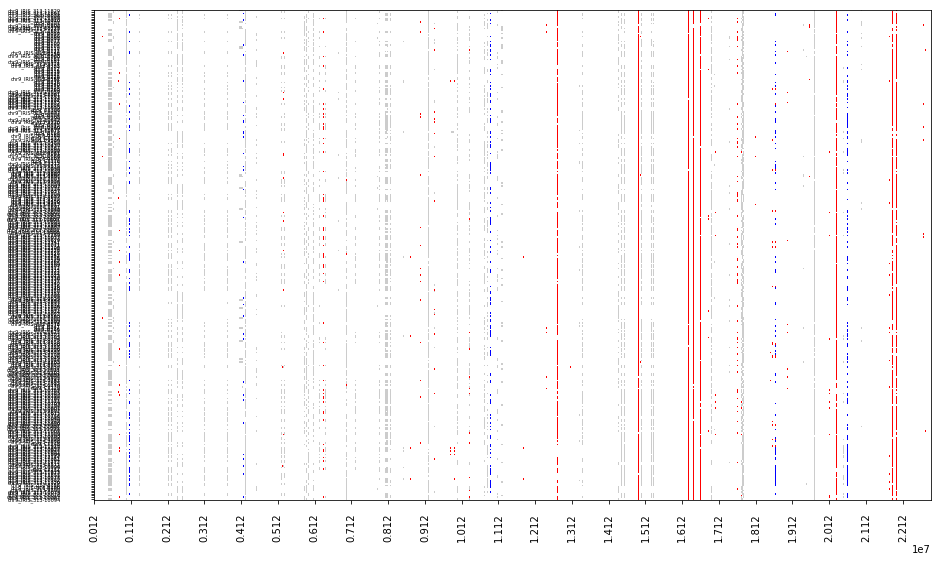

In [20]:
from targeted_tools import mpl_target_ideo, chromosome_collections
    
select_label= [3,4]
Chr= 9

Colors= {
    -1: [192,192,192],
    1: [255,0,0],
    3: [255,0,0],
    4: [0,0,255],
    6: [0,0,255],
    7: [0,0,0],
    8: [255,0,0],
    9: [255,0,0],
    2: [0,0,0]
}

if plot_tool== 'plotly':

    Colors= {
        x: 'rgba(' + ','.join([str(z) for z in Colors[x]]) + ',1)' for x in Colors.keys()
    }

    target_ideogram(select_label,Coordinates,IDs,Colors=Colors,Chr= Chr,background= False,height_chrom= .5,height= 10,width= 5)

if plot_tool== 'mpl':
    
    background= True
    ideo_height= 1
    ideo_spacing= 0
    height= 9
    width= 15
    
    xticks= 1e6
    fig_save= True
    fig_id= 'ideo_target'
    Home= ''


    mpl_target_ideo(select_label,
                    Coordinates,
                    IDs,
                    order= order,
                    background= True,
                    Chr= Chr,
                    ideo_height= 1,
                    ideo_spacing= 0,
                    xticks= xticks,
                    fig_save= fig_save,
                    fig_id= 'ideo_target',
                    Colors= Colors,
                    height= height,
                    width= width,
                   Home= Home)



#### C. density of selected clusters across chromosomes

In [12]:
Home

''

In [13]:
select_label= 9

bandwidth_gen= 10e4

In [14]:
## Plot physical distribution of clusters included in the analytsis.
import plotly.plotly as py
from sklearn.neighbors import KernelDensity
import itertools as it

select_lab= select_label -1


chromosomes= Coordinates.chrom.unique()
x_range= [0,max(Coordinates.end)]

from plotly import tools

fig = tools.make_subplots(rows=len(chromosomes), cols=1,shared_xaxes=True)

for Chr in chromosomes:
    
    sub_slice= Coordinates.loc[Coordinates['chrom']==Chr]
    sub_slice= sub_slice.reset_index(drop=True)
    EN= [str(x).split('.') for x in sub_slice.members]
    
    count= [[sub_slice.start[x]] * len(EN[x]) for x in range(sub_slice.shape[0]) if sub_slice.label[x] == select_lab]
    count= [x for x in it.chain(*count)]
    
    locs= count
    
    X_plot = np.linspace(x_range[0], x_range[1], 1000)

    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth_gen).fit(np.array(locs).reshape(-1,1))

    log_dens = kde.score_samples(X_plot.reshape(-1,1))
    
    trace= go.Scatter(x=X_plot, y=np.exp(log_dens), 
                                mode='lines', fill='tozeroy', name= 'chr: {}'.format(Chr),
                                line=dict(color='red', width=2))
    
    fig['layout']['yaxis' + str(Chr)].update(range=[0, 1e-6],title='CHR ' + str(Chr))
    
    fig.append_trace(trace,row= int(Chr),col= 1)

fig['layout'].update(height=1200, width=800, title='Genome dist')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  
[ (2,1) x1,y2 ]  
[ (3,1) x1,y3 ]  
[ (4,1) x1,y4 ]  
[ (5,1) x1,y5 ]  
[ (6,1) x1,y6 ]  
[ (7,1) x1,y7 ]  
[ (8,1) x1,y8 ]  
[ (9,1) x1,y9 ]  
[ (10,1) x1,y10 ]
[ (11,1) x1,y11 ]
[ (12,1) x1,y12 ]



#### VI. Output IDs

Extract individiduals based on a lower threshold on average *p*-value for a given group of vectors.


In [38]:
ext_threshold= .4
ext_grp= 10

names_index = [[f for f in orderCore.ID].index(x) for x in [str(y) for y in df.iloc[:,1]]]

density_values= vectors.iloc[:,ext_grp-1]

extract= [x for x in range(vectors.shape[0]) if density_values[x] >= ext_threshold]

if extract:
    extract= [names_index[x] for x in extract]

    subgpID= [orderCore.ID[x] for x in extract]
    print(len(subgpID))

    filename= 'IDs_{}_gp{}_th{}.txt'.format(ID,str(ext_grp),str(ext_threshold))

    Output= open(filename,'w')

    Output.write('\n'.join(subgpID))

    Output.close()


46
